In [1]:
import pandas as pd
df1 = pd.read_csv('Medical_Image_Data_01.csv', encoding='cp949')
df2 = pd.read_csv('Patient_Diagnosis_Data.csv')
df3 = pd.read_csv('Patient_Surgery_Data.csv')
df1.isnull().sum()

환자ID                0
전방디스크높이(mm)         0
후방디스크높이(mm)         0
지방축적도               3
Instability         0
MF + ES             0
Modic change        0
PI                  4
PT                  4
Seg Angle(raw)      1
Vaccum disc         0
골밀도               896
디스크단면적              1
디스크위치               0
척추이동척도              0
척추전방위증              0
dtype: int64

In [2]:
import matplotlib.pyplot as plt
import matplotlib

plt.rc('font', family='NanumBarunGothic')
matplotlib.rc('axes',unicode_minus=False)

In [3]:
merge1 = pd.merge(df1, df2, on='환자ID', how='inner')
final = pd.merge(merge1, df3, on=['환자ID','연령', '입원일자', '신장', '체중', '퇴원일자', '헤모글로빈수치', '환자통증정도', '통증기간(월)'],how='inner')
final.columns

Index(['환자ID', '전방디스크높이(mm)', '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES',
       'Modic change', 'PI', 'PT', 'Seg Angle(raw)', 'Vaccum disc', '골밀도',
       '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증', 'Large Lymphocyte',
       'Location of herniation', 'ODI', '가족력', '간질성폐질환', '고혈압여부', '과거수술횟수',
       '당뇨여부', '말초동맥질환여부', '빈혈여부', '성별', '스테로이드치료', '신부전여부', '신장', '심혈관질환',
       '암발병여부', '연령', '우울증여부', '입원기간', '입원일자', '종양진행여부', '직업', '체중', '퇴원일자',
       '헤모글로빈수치', '혈전합병증여부', '환자통증정도', '흡연여부', '통증기간(월)', '수술기법', '수술시간',
       '수술실패여부', '수술일자', '재발여부', '혈액형'],
      dtype='object')

수술 기법이 없는 사람들에 대한 특징 조사
- 개복하면 아무 문제가 없어서 수술 안한 사람들일 수도 있어서

In [5]:
surgery_o = final[final['수술기법'].notna()]

In [6]:
surgery_o

,환자ID,전방디스크높이(mm),후방디스크높이(mm),지방축적도,Instability,MF + ES,Modic change,PI,PT,Seg Angle(raw),...,혈전합병증여부,환자통증정도,흡연여부,통증기간(월),수술기법,수술시간,수술실패여부,수술일자,재발여부,혈액형
0,1PT,16.1,12.3,282.3,0,1824.6,3,51.6,36.6,14.4,...,0,10,0,1.0,TELD,68.0,0,20190715,0,RH+A
1,2PT,13.7,6.4,177.3,0,1737.5,0,40.8,7.2,17.8,...,0,10,0,1.0,TELD,31.0,0,20190716,0,RH+A
2,3PT,13.6,7.4,256.8,0,1188.5,0,67.5,27.3,10.2,...,0,7,0,1.0,TELD,78.0,0,20190731,0,RH+B
3,4PT,10.6,7.3,250.1,0,2534.5,0,49.2,18.7,19.9,...,0,7,0,2.0,TELD,73.0,0,20190802,0,RH+O
4,5PT,17.1,8.1,232.2,0,1840.6,0,58.8,14.7,5.2,...,0,7,0,1.0,TELD,29.0,0,20190906,0,RH+A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1870,1871PT,8.5,9.0,182.5,0,1919.5,0,31.7,14.9,9.6,...,0,7,0,24.0,TELD,35.0,0,20170306,0,RH+O
1872,1873PT,11.6,7.2,94.2,0,2398.9,0,39.4,8.0,19.5,...,0,8,1,36.0,TELD,60.0,0,20170316,0,RH+A
1874,1875PT,11.1,7.6,126.1,1,1970.3,2,43.6,17.7,9.1,...,0,6,1,6.0,TELD,70.0,0,20170929,0,RH+B
1879,1880PT,12.7,8.7,207.4,0,2220.1,0,34.0,19.0,6.0,...,0,8,0,4.0,TELD,45.0,0,20170605,0,RH+B


In [7]:
final['수술기법1'] = final['수술기법'].fillna(value = 0)

In [8]:
final

,환자ID,전방디스크높이(mm),후방디스크높이(mm),지방축적도,Instability,MF + ES,Modic change,PI,PT,Seg Angle(raw),...,환자통증정도,흡연여부,통증기간(월),수술기법,수술시간,수술실패여부,수술일자,재발여부,혈액형,수술기법1
0,1PT,16.1,12.3,282.3,0,1824.6,3,51.6,36.6,14.4,...,10,0,1.0,TELD,68.0,0,20190715,0,RH+A,TELD
1,2PT,13.7,6.4,177.3,0,1737.5,0,40.8,7.2,17.8,...,10,0,1.0,TELD,31.0,0,20190716,0,RH+A,TELD
2,3PT,13.6,7.4,256.8,0,1188.5,0,67.5,27.3,10.2,...,7,0,1.0,TELD,78.0,0,20190731,0,RH+B,TELD
3,4PT,10.6,7.3,250.1,0,2534.5,0,49.2,18.7,19.9,...,7,0,2.0,TELD,73.0,0,20190802,0,RH+O,TELD
4,5PT,17.1,8.1,232.2,0,1840.6,0,58.8,14.7,5.2,...,7,0,1.0,TELD,29.0,0,20190906,0,RH+A,TELD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,1890PT,17.0,10.7,237.5,0,2795.7,2,59.5,23.0,21.8,...,7,0,12.0,NaN,80.0,0,20170407,0,RH+A,0
1890,1891PT,9.4,8.2,288.0,0,1473.0,0,47.7,20.2,5.0,...,7,0,6.0,NaN,20.0,0,20170427,0,RH+B,0
1891,1892PT,13.5,5.5,148.5,0,3864.1,0,44.6,15.0,17.4,...,7,0,1.0,IELD,50.0,0,20170411,0,RH+O,IELD
1892,1893PT,14.0,10.0,89.0,0,2481.8,2,32.2,11.1,17.7,...,7,0,24.0,NaN,25.0,0,20170410,0,RH+A,0


- 수술기법이 0일때의 PI(평균),골밀도,지방축적도,스테로이드치료여부(0,1)(범주형), segangle
- 수술기법이 0이 아닐때의 PI, 골밀도, 스테로이드치료여부(0,1)

### 수술 여부와 스테로이드 치료 관련

In [9]:
cond1 = (final['수술기법1']==0)
final_1 = final.loc[cond1]

In [44]:
final_1

,환자ID,전방디스크높이(mm),후방디스크높이(mm),지방축적도,Instability,MF + ES,Modic change,PI,PT,Seg Angle(raw),...,환자통증정도,흡연여부,통증기간(월),수술기법,수술시간,수술실패여부,수술일자,재발여부,혈액형,수술기법1
151,152PT,8.2,8.81,278.86,0,1878.65,0,35.0,28.2,5.3,...,2,1,1.0,NaN,49.0,0,20190103,0,RH+B,0
340,341PT,12.4,9.20,288.90,0,2743.90,0,59.1,25.7,14.3,...,8,0,2.0,NaN,66.0,0,20200622,0,RH+A,0
450,451PT,9.5,9.20,286.50,0,1630.90,0,45.9,23.8,12.7,...,4,1,1.0,NaN,55.0,0,20190227,0,RH+B,0
451,452PT,9.0,9.00,109.40,0,1668.80,2,45.3,12.0,14.0,...,5,0,1.0,NaN,71.0,0,20190401,0,RH+O,0
452,453PT,13.7,6.60,220.30,0,1897.80,0,23.0,2.2,36.3,...,9,1,2.0,NaN,57.0,0,20190414,0,RH+A,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1888,1889PT,10.1,7.40,152.60,0,2203.50,0,54.2,21.3,6.8,...,5,0,6.0,NaN,30.0,0,20170511,0,RH+A,0
1889,1890PT,17.0,10.70,237.50,0,2795.70,2,59.5,23.0,21.8,...,7,0,12.0,NaN,80.0,0,20170407,0,RH+A,0
1890,1891PT,9.4,8.20,288.00,0,1473.00,0,47.7,20.2,5.0,...,7,0,6.0,NaN,20.0,0,20170427,0,RH+B,0
1892,1893PT,14.0,10.00,89.00,0,2481.80,2,32.2,11.1,17.7,...,7,0,24.0,NaN,25.0,0,20170410,0,RH+A,0


In [12]:
cond2 = (final['수술기법1']!= 0)
final_2 = final.loc[cond2]

In [13]:
final_2

,환자ID,전방디스크높이(mm),후방디스크높이(mm),지방축적도,Instability,MF + ES,Modic change,PI,PT,Seg Angle(raw),...,환자통증정도,흡연여부,통증기간(월),수술기법,수술시간,수술실패여부,수술일자,재발여부,혈액형,수술기법1
0,1PT,16.1,12.3,282.3,0,1824.6,3,51.6,36.6,14.4,...,10,0,1.0,TELD,68.0,0,20190715,0,RH+A,TELD
1,2PT,13.7,6.4,177.3,0,1737.5,0,40.8,7.2,17.8,...,10,0,1.0,TELD,31.0,0,20190716,0,RH+A,TELD
2,3PT,13.6,7.4,256.8,0,1188.5,0,67.5,27.3,10.2,...,7,0,1.0,TELD,78.0,0,20190731,0,RH+B,TELD
3,4PT,10.6,7.3,250.1,0,2534.5,0,49.2,18.7,19.9,...,7,0,2.0,TELD,73.0,0,20190802,0,RH+O,TELD
4,5PT,17.1,8.1,232.2,0,1840.6,0,58.8,14.7,5.2,...,7,0,1.0,TELD,29.0,0,20190906,0,RH+A,TELD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1870,1871PT,8.5,9.0,182.5,0,1919.5,0,31.7,14.9,9.6,...,7,0,24.0,TELD,35.0,0,20170306,0,RH+O,TELD
1872,1873PT,11.6,7.2,94.2,0,2398.9,0,39.4,8.0,19.5,...,8,1,36.0,TELD,60.0,0,20170316,0,RH+A,TELD
1874,1875PT,11.1,7.6,126.1,1,1970.3,2,43.6,17.7,9.1,...,6,1,6.0,TELD,70.0,0,20170929,0,RH+B,TELD
1879,1880PT,12.7,8.7,207.4,0,2220.1,0,34.0,19.0,6.0,...,8,0,4.0,TELD,45.0,0,20170605,0,RH+B,TELD


In [14]:
final['수술기법2'] = np.where(final['수술기법1']!= 0, '1','0')

In [15]:
final['수술기법2']

0       1
1       1
2       1
3       1
4       1
       ..
1889    0
1890    0
1891    1
1892    0
1893    0
Name: 수술기법2, Length: 1894, dtype: object

In [18]:
final

,환자ID,전방디스크높이(mm),후방디스크높이(mm),지방축적도,Instability,MF + ES,Modic change,PI,PT,Seg Angle(raw),...,흡연여부,통증기간(월),수술기법,수술시간,수술실패여부,수술일자,재발여부,혈액형,수술기법1,수술기법2
0,1PT,16.1,12.3,282.3,0,1824.6,3,51.6,36.6,14.4,...,0,1.0,TELD,68.0,0,20190715,0,RH+A,TELD,1
1,2PT,13.7,6.4,177.3,0,1737.5,0,40.8,7.2,17.8,...,0,1.0,TELD,31.0,0,20190716,0,RH+A,TELD,1
2,3PT,13.6,7.4,256.8,0,1188.5,0,67.5,27.3,10.2,...,0,1.0,TELD,78.0,0,20190731,0,RH+B,TELD,1
3,4PT,10.6,7.3,250.1,0,2534.5,0,49.2,18.7,19.9,...,0,2.0,TELD,73.0,0,20190802,0,RH+O,TELD,1
4,5PT,17.1,8.1,232.2,0,1840.6,0,58.8,14.7,5.2,...,0,1.0,TELD,29.0,0,20190906,0,RH+A,TELD,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,1890PT,17.0,10.7,237.5,0,2795.7,2,59.5,23.0,21.8,...,0,12.0,NaN,80.0,0,20170407,0,RH+A,0,0
1890,1891PT,9.4,8.2,288.0,0,1473.0,0,47.7,20.2,5.0,...,0,6.0,NaN,20.0,0,20170427,0,RH+B,0,0
1891,1892PT,13.5,5.5,148.5,0,3864.1,0,44.6,15.0,17.4,...,0,1.0,IELD,50.0,0,20170411,0,RH+O,IELD,1
1892,1893PT,14.0,10.0,89.0,0,2481.8,2,32.2,11.1,17.7,...,0,24.0,NaN,25.0,0,20170410,0,RH+A,0,0


In [ ]:
# sns.boxplot(x = final['수술기법2'], y = final['스테로이드치료'])

In [24]:
import pandas as pd
from scipy.stats import chi2_contingency

In [28]:
import scipy.stats as stats

In [29]:
pd.crosstab(final['수술기법2'], final['스테로이드치료'])

스테로이드치료,0,1
수술기법2,,
0,28,53
1,732,1081


In [30]:
result = pd.crosstab(final['수술기법2'], final['스테로이드치료'])
result

스테로이드치료,0,1
수술기법2,,
0,28,53
1,732,1081


#### 결론 - 상관성이 없다

In [31]:
stats.chi2_contingency(observed = result)

(0.8600495998644151,
 0.3537248117841524,
 1,
 array([[  32.50263992,   48.49736008],
        [ 727.49736008, 1085.50263992]]))

### TELD와 IELD와 스테로이드 치료 관련

In [32]:
final

,환자ID,전방디스크높이(mm),후방디스크높이(mm),지방축적도,Instability,MF + ES,Modic change,PI,PT,Seg Angle(raw),...,흡연여부,통증기간(월),수술기법,수술시간,수술실패여부,수술일자,재발여부,혈액형,수술기법1,수술기법2
0,1PT,16.1,12.3,282.3,0,1824.6,3,51.6,36.6,14.4,...,0,1.0,TELD,68.0,0,20190715,0,RH+A,TELD,1
1,2PT,13.7,6.4,177.3,0,1737.5,0,40.8,7.2,17.8,...,0,1.0,TELD,31.0,0,20190716,0,RH+A,TELD,1
2,3PT,13.6,7.4,256.8,0,1188.5,0,67.5,27.3,10.2,...,0,1.0,TELD,78.0,0,20190731,0,RH+B,TELD,1
3,4PT,10.6,7.3,250.1,0,2534.5,0,49.2,18.7,19.9,...,0,2.0,TELD,73.0,0,20190802,0,RH+O,TELD,1
4,5PT,17.1,8.1,232.2,0,1840.6,0,58.8,14.7,5.2,...,0,1.0,TELD,29.0,0,20190906,0,RH+A,TELD,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,1890PT,17.0,10.7,237.5,0,2795.7,2,59.5,23.0,21.8,...,0,12.0,NaN,80.0,0,20170407,0,RH+A,0,0
1890,1891PT,9.4,8.2,288.0,0,1473.0,0,47.7,20.2,5.0,...,0,6.0,NaN,20.0,0,20170427,0,RH+B,0,0
1891,1892PT,13.5,5.5,148.5,0,3864.1,0,44.6,15.0,17.4,...,0,1.0,IELD,50.0,0,20170411,0,RH+O,IELD,1
1892,1893PT,14.0,10.0,89.0,0,2481.8,2,32.2,11.1,17.7,...,0,24.0,NaN,25.0,0,20170410,0,RH+A,0,0


In [33]:
final_t = final.loc[final['수술기법1'] == 'TELD' ]

In [34]:
final_t

,환자ID,전방디스크높이(mm),후방디스크높이(mm),지방축적도,Instability,MF + ES,Modic change,PI,PT,Seg Angle(raw),...,흡연여부,통증기간(월),수술기법,수술시간,수술실패여부,수술일자,재발여부,혈액형,수술기법1,수술기법2
0,1PT,16.1,12.3,282.3,0,1824.6,3,51.6,36.6,14.4,...,0,1.0,TELD,68.0,0,20190715,0,RH+A,TELD,1
1,2PT,13.7,6.4,177.3,0,1737.5,0,40.8,7.2,17.8,...,0,1.0,TELD,31.0,0,20190716,0,RH+A,TELD,1
2,3PT,13.6,7.4,256.8,0,1188.5,0,67.5,27.3,10.2,...,0,1.0,TELD,78.0,0,20190731,0,RH+B,TELD,1
3,4PT,10.6,7.3,250.1,0,2534.5,0,49.2,18.7,19.9,...,0,2.0,TELD,73.0,0,20190802,0,RH+O,TELD,1
4,5PT,17.1,8.1,232.2,0,1840.6,0,58.8,14.7,5.2,...,0,1.0,TELD,29.0,0,20190906,0,RH+A,TELD,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1845,1846PT,12.1,8.0,211.1,0,2600.0,0,41.9,11.6,4.7,...,0,9.0,TELD,60.0,0,20161228,0,RH+AB,TELD,1
1870,1871PT,8.5,9.0,182.5,0,1919.5,0,31.7,14.9,9.6,...,0,24.0,TELD,35.0,0,20170306,0,RH+O,TELD,1
1872,1873PT,11.6,7.2,94.2,0,2398.9,0,39.4,8.0,19.5,...,1,36.0,TELD,60.0,0,20170316,0,RH+A,TELD,1
1874,1875PT,11.1,7.6,126.1,1,1970.3,2,43.6,17.7,9.1,...,1,6.0,TELD,70.0,0,20170929,0,RH+B,TELD,1


In [35]:
final_i = final.loc[final['수술기법1'] == 'IELD' ]

In [36]:
final_i

,환자ID,전방디스크높이(mm),후방디스크높이(mm),지방축적도,Instability,MF + ES,Modic change,PI,PT,Seg Angle(raw),...,흡연여부,통증기간(월),수술기법,수술시간,수술실패여부,수술일자,재발여부,혈액형,수술기법1,수술기법2
19,20PT,12.70,7.80,220.50,0,2101.30,0,37.1,11.9,11.9,...,1,2.0,IELD,73.0,0,20190227,0,RH+O,IELD,1
30,31PT,17.20,8.50,229.20,0,2097.40,0,45.3,14.9,20.2,...,0,1.0,IELD,58.0,0,20191218,0,RH+O,IELD,1
36,37PT,9.90,3.40,109.80,0,1669.70,0,31.8,6.0,16.8,...,0,1.0,IELD,54.0,0,20200303,0,RH+A,IELD,1
43,44PT,11.19,8.79,107.51,0,3679.32,0,47.0,16.0,3.0,...,1,1.0,IELD,65.0,0,20190407,0,RH+O,IELD,1
84,85PT,10.70,9.30,87.30,0,2545.50,0,34.7,10.1,11.0,...,1,3.0,IELD,54.0,0,20191221,1,RH+A,IELD,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1818,1819PT,8.10,2.00,169.00,0,1786.00,0,45.8,7.5,20.9,...,0,1.5,IELD,85.0,1,20150209,0,RH+B,IELD,1
1849,1850PT,13.80,7.40,263.00,0,2221.40,0,47.5,13.2,14.2,...,1,12.0,IELD,30.0,0,20170111,0,RH+A,IELD,1
1865,1866PT,17.00,7.20,380.50,1,1767.60,2,52.9,19.7,18.4,...,0,3.0,IELD,20.0,0,20170221,0,RH+A,IELD,1
1866,1867PT,14.10,8.10,247.80,0,3063.40,2,48.0,12.8,27.1,...,1,6.0,IELD,145.0,0,20170221,1,RH+B,IELD,1


In [39]:
final_ti = final.loc[(final['수술기법1'] == 'TELD') | (final['수술기법'] == 'IELD')]

In [40]:
pd.crosstab(final_ti['수술기법1'], final_ti['스테로이드치료'])

스테로이드치료,0,1
수술기법1,,
IELD,63,77
TELD,669,1004


In [41]:
stats.chi2_contingency(observed = result)

(0.8600495998644151,
 0.3537248117841524,
 1,
 array([[  32.50263992,   48.49736008],
        [ 727.49736008, 1085.50263992]]))

#### 결론 - 상관성이 없다

### Seg angle (raw)

In [45]:
final_1.pivot_table(index='수술기법1',values='Seg Angle(raw)'
                  ,aggfunc=['mean','min','max'])

,mean,min,max
,Seg Angle(raw),Seg Angle(raw),Seg Angle(raw)
수술기법1,,,
0,17.245679,0.3,36.3


In [46]:
final_ti.pivot_table(index='수술기법1',values='Seg Angle(raw)'
                  ,aggfunc=['mean','min','max'])

,mean,min,max
,Seg Angle(raw),Seg Angle(raw),Seg Angle(raw)
수술기법1,,,
IELD,18.079286,0.4,36.8
TELD,14.959366,-27.4,165.0


In [47]:
df1 = final_ti[final_ti['수술기법1'] == 'TELD']

In [48]:
df1_ = pd.DataFrame(df1['Seg Angle(raw)'])

In [49]:
df1_.isnull().sum()

Seg Angle(raw)    1
dtype: int64

<AxesSubplot:>

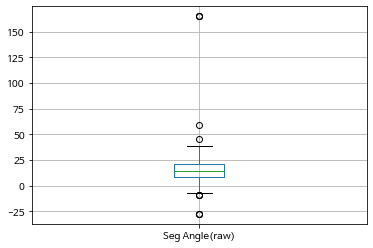

In [50]:
df1_.boxplot()

In [51]:
df1_[df1_['Seg Angle(raw)']<0]

,Seg Angle(raw)
55,-1.8
206,-9.4
397,-4.9
408,-27.4
525,-1.8
676,-9.4
867,-4.9
878,-27.4
1034,-5.0
1066,-1.8


In [52]:
df1_.dropna(inplace=True)

In [53]:
df1_.isnull().sum()

Seg Angle(raw)    0
dtype: int64

In [54]:
df2 = final_2[final_2['수술기법1'] == 'IELD']>>> s

In [55]:
df2_ = pd.DataFrame(df2['Seg Angle(raw)'])

In [56]:
df2_.count() 

Seg Angle(raw)    140
dtype: int64

<AxesSubplot:>

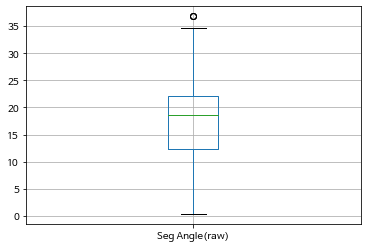

In [57]:
df2_.boxplot()

In [58]:
df2_.isnull().sum()

Seg Angle(raw)    0
dtype: int64

In [59]:
t_result = stats.ttest_ind(df1_, df2_)

In [60]:
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2_sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))

2_sample t-test
t:[-3.399]
p:[0.001]


정규성 분포 / 등분산성 확인하기

In [62]:
from scipy.stats import shapiro

In [63]:
shapiro(df1_)

ShapiroResult(statistic=0.7531682252883911, pvalue=1.8216880036222622e-44)

In [64]:
shapiro(df2_)

ShapiroResult(statistic=0.98493492603302, pvalue=0.1282816380262375)

In [65]:
from scipy import stats as st

In [66]:
st.ranksums(df1_, df2_)

RanksumsResult(statistic=-4.6508286471646825, pvalue=3.306039401701325e-06)

#### 결론 - 통계적으로 유의미한 차이가 없다